In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/pd_speech_features.csv")
print(df)

      id  gender  ...  tqwt_kurtosisValue_dec_36  class
0      0       1  ...                    18.9405      1
1      0       1  ...                    45.1780      1
2      0       1  ...                     4.7666      1
3      1       0  ...                     4.0603      1
4      1       0  ...                     6.1164      1
..   ...     ...  ...                        ...    ...
751  250       0  ...                     6.8671      0
752  250       0  ...                    28.4170      0
753  251       0  ...                     5.0424      0
754  251       0  ...                     3.7131      0
755  251       0  ...                     3.1527      0

[756 rows x 755 columns]


In [ ]:
x = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values
print("x: ")
print(x)
print("y: ")
print(y)

x: 
[[  0.        1.        0.85247 ...   2.6202    3.0004   18.9405 ]
 [  0.        1.        0.76686 ...   6.5245    6.3431   45.178  ]
 [  0.        1.        0.85083 ...   2.9199    3.1495    4.7666 ]
 ...
 [251.        0.        0.88389 ...   3.5377    3.3545    5.0424 ]
 [251.        0.        0.83782 ...   2.6801    2.8332    3.7131 ]
 [251.        0.        0.81304 ...   4.0116    2.6217    3.1527 ]]
y: 
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1
 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0
 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state= 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

Text(0, 0.5, 'Accuracy')

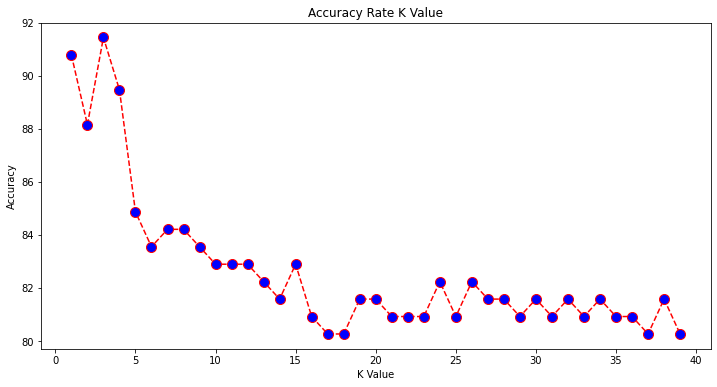

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
error = []
import matplotlib.pyplot as plt
for i in range(1, 40):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train, y_train)
  i_pred = model.predict(x_test)
  error.append((accuracy_score(y_test, i_pred)*100))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [ ]:
Knn = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
Knn.fit(x_train,y_train)
y_pred=Knn.predict(x_test)
print("y_pred: ")
print(y_pred)
print("y_test: ")
print(y_test)

y_pred: 
[0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1]
y_test: 
[0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1
 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1
 1 0 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
c = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: ")
print(c)
print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix: 
[[ 28  10]
 [  3 111]]
Accuracy of the Model: 91.44736842105263%
